In [8]:
# %load ./utils/samples.py
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## 3.5 用核支持向量机求解非线性问题

支持向量机可以通过核化来解决非线性分类问题。

利用下述代码创建一个简单的数据集，调用`Numpy`的`logical_or`函数形成一个异或门

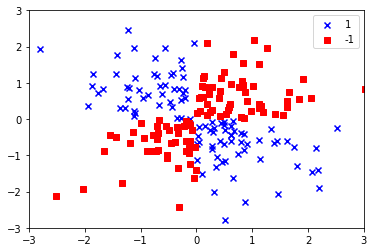

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

上方创建的数据集很显然不能使用*线性逻辑回归*或者*线性支持向量机模型*所产生的线性超平面作为决策边界来分隔样本的正类和负类

**核方法**的逻辑是针对线性不可分数据，建立非线性拟合，通过映射函数把原始特征投影到一个高维空间，特征在该空间变得线性可分。

$$\phi(x_1, x_2)=(z_1, z_2, z_3)=(x_1, x_2, x_1^2+x_2^2)$$

如图所示

![投影后线性可分](./img/投射至高维空间后线性可分.png)

### 利用核技巧，发现高维空间的分离超平面

In [10]:
from sklearn.svm import SVC

In [11]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

In [12]:
from utils.plot_decision_regions import plot_decision_regions

d:\Code\Python\Python_Machine_Learning_Code\utils\plot_decision_regions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


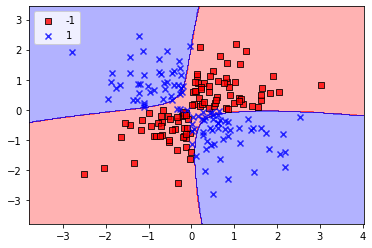

In [13]:
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.show()

d:\Code\Python\Python_Machine_Learning_Code\utils\plot_decision_regions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


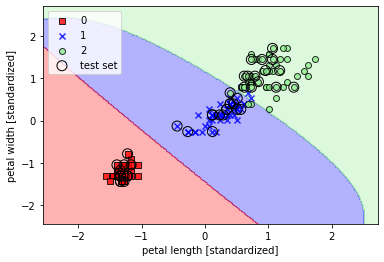

In [16]:
# 增大参数γ的值
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

d:\Code\Python\Python_Machine_Learning_Code\utils\plot_decision_regions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


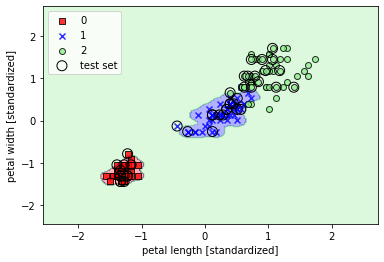

In [17]:
# 观察增大γ值对决策边界的影响

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()